# 4.10 TASK Part 1A

# Contents

    01. Importing Libraries
    02. Importing Data
    03. Addressing PII
    04. Creating 'Region' column
    05. Creating customer activity subsets
    06. Exporting subsets
    07. Exporting Data



# 01. Importing Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing data

In [2]:
# creating path for import

path = r'/Users/bdigregorio/Desktop/CareerFoundry/' \
r'Data Immersion/Data Immersion 4/DI 4.2/Instacart Basket Analysis'

In [3]:
#check path
path

'/Users/bdigregorio/Desktop/CareerFoundry/Data Immersion/Data Immersion 4/DI 4.2/Instacart Basket Analysis'

In [4]:
# importing Orders_products_all.pkl

Orders_products_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Orders_products_all.pkl'))


In [5]:
Orders_products_all.shape

(32642450, 36)

In [6]:
Orders_products_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32642450 entries, 0 to 32642449
Data columns (total 36 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 int64   
 1   first_name              object  
 2   last_name               object  
 3   gender                  object  
 4   state                   object  
 5   age                     int64   
 6   date_joined             object  
 7   number_of_dependents    int64   
 8   family_status           object  
 9   income                  int64   
 10  order_id                float64 
 11  order_number            float64 
 12  orders_day_of_the_week  float64 
 13  order_hour_of_day       float64 
 14  days_since_prior_order  float64 
 15  product_id              float64 
 16  add_to_cart_order       float64 
 17  reordered               float64 
 18  ords_priors_combined    category
 19  Unnamed: 0              float64 
 20  product_name            object  
 21  aisle_

# 03. Addressing PII

In [7]:
# Task step 2: addressing PII

After consultation it has been decided that in order to meet PII standards for data security, the columns of 'first_name' and 'last_name' should be omitted from the data set as this information could pose a security breach.

In [8]:
Orders_products_all_2 = Orders_products_all.drop(columns = ['first_name','last_name'])


In [9]:
# dropping additional unneeded columns
Orders_products_all_2 = Orders_products_all.drop(columns = ['ords_priors_combined', 'prods_clened_combined', '_merge', 'Unnamed: 0'],)


In [10]:
# checking with .info()
Orders_products_all_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32642450 entries, 0 to 32642449
Data columns (total 32 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int64  
 1   first_name              object 
 2   last_name               object 
 3   gender                  object 
 4   state                   object 
 5   age                     int64  
 6   date_joined             object 
 7   number_of_dependents    int64  
 8   family_status           object 
 9   income                  int64  
 10  order_id                float64
 11  order_number            float64
 12  orders_day_of_the_week  float64
 13  order_hour_of_day       float64
 14  days_since_prior_order  float64
 15  product_id              float64
 16  add_to_cart_order       float64
 17  reordered               float64
 18  product_name            object 
 19  aisle_id                float64
 20  department_id           float64
 21  prices                  float

PII standards met with 'first_name' and 'last_name' columns removed

# 04. Creating 'Region' column

In [11]:
# Task step 3a: Create a regional segmentation of the data

In [12]:
# checking 'state' column
Orders_products_all_2['state'].value_counts(dropna = False)

Pennsylvania            671793
California              664517
Rhode Island            661727
Georgia                 661161
New Mexico              659236
Arizona                 658638
North Carolina          656400
Oklahoma                656339
Alaska                  653094
Minnesota               652493
Massachusetts           651083
Wyoming                 648998
Virginia                646157
Missouri                645395
Texas                   645132
Colorado                643877
Maine                   643228
North Dakota            643056
Alabama                 642732
Louisiana               642246
Kansas                  642096
Delaware                641546
South Carolina          641480
Oregon                  641026
Arkansas                640795
New York                640770
Nevada                  640764
Montana                 639896
South Dakota            638419
Illinois                637555
Washington              637513
Hawaii                  637511
Mississi

In [13]:
# defining "Region" column based on "state"

Region = []

for value in Orders_products_all['state']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island' , 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
       Region.append('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']: 
       Region.append('Midwest')
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        Region.append('South')
    else:
        Region.append('West')


In [14]:
# creating columns
Orders_products_all_2['Region']= Region

In [15]:
# checking 'Region' result
Orders_products_all_2.head(20)

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income,...,busiest_day,busiest_days,Most orders,max_order,loyalty_flag,avg_spent,spender_type,median_order_days,customer_type,Region
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Fewest orders,9.0,New customer,7.988889,Low spender,20.0,Regular customer,Midwest
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,9.0,New customer,7.988889,Low spender,20.0,Regular customer,Midwest
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,9.0,New customer,7.988889,Low spender,20.0,Regular customer,Midwest
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Fewest orders,9.0,New customer,7.988889,High spender,20.0,Regular customer,Midwest
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,9.0,New customer,7.988889,High spender,20.0,Regular customer,Midwest
5,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Fewest orders,9.0,New customer,7.988889,High spender,20.0,Regular customer,Midwest
6,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Fewest orders,9.0,New customer,7.988889,High spender,20.0,Regular customer,Midwest
7,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,9.0,New customer,7.988889,High spender,20.0,Regular customer,Midwest
8,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,9.0,New customer,7.988889,High spender,20.0,Regular customer,Midwest
9,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Fewest orders,9.0,New customer,7.988889,Low spender,20.0,Regular customer,Midwest


In [16]:
Orders_products_all_2['Region'].value_counts(dropna = False)

South        10871134
West          8353486
Midwest       7652795
Northeast     5765035
Name: Region, dtype: int64

Region column successfully created.

In [17]:
# Step 3b: Determine whether there’s a difference in spending habits between the different U.S. regions 

In [18]:
# creating crosstab with 'Region' and 'spender_type'
crosstab = pd.crosstab(Orders_products_all_2['Region'], Orders_products_all_2['spender_type'], dropna = False)


In [19]:
# cross tab results for Excel chart
crosstab.to_clipboard()

In [20]:
# checking crosstab results 
crosstab

spender_type,High spender,Low spender
Region,,
Midwest,2503257,5052668
Northeast,1880583,3816077
South,3558931,7182827
West,2729318,5524595


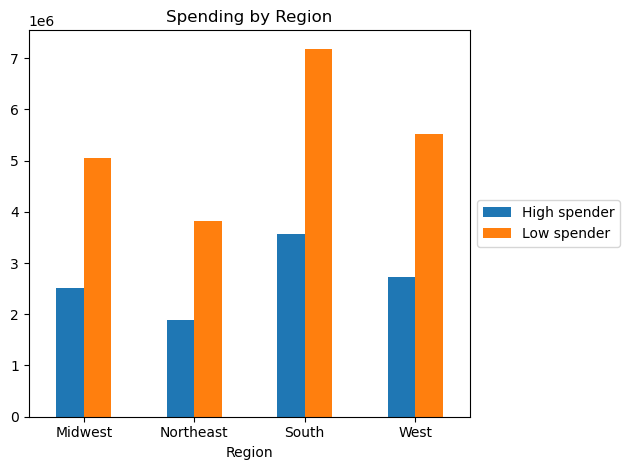

In [21]:
bar = crosstab.plot.bar()
plt.title('Spending by Region')
plt.legend(loc = 'center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=0)
plt.tight_layout()

We can see from this comparison that Low spenders in each region are just about double the High spenders.

In [22]:
# exporting bar_spend_by_region
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_spend_by_region.png')) 

# 05. Creating customer activity subsets


In [23]:
# Task step 4: Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data


In [24]:
# creating high and low activity flags based on 'max order'
Orders_products_all_2.loc[Orders_products_all_2['max_order'] >= 5, 'customer_activity']= 'High_activity'


In [25]:
Orders_products_all_2.loc[Orders_products_all_2['max_order'] < 5, 'customer_activity']= 'Low_activity'


In [26]:
# checking column
Orders_products_all_2['customer_activity'].value_counts(dropna = False)

High_activity    31931134
Low_activity       711316
Name: customer_activity, dtype: int64

In [27]:
# creating subsets for export
# low_active_customer 
low_active_customer = Orders_products_all_2.loc[Orders_products_all_2['customer_activity'] == 'Low_activity'] 


In [28]:
# high_active_customer
high_active_customer = Orders_products_all_2.loc[Orders_products_all_2['customer_activity'] == 'High_activity'] 


In [29]:
# checking subset low_active_customer
low_active_customer.head()

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income,...,busiest_days,Most orders,max_order,loyalty_flag,avg_spent,spender_type,median_order_days,customer_type,Region,customer_activity
736,168851,Joseph,Hickman,Male,South Carolina,30,1/1/2017,0,single,63712,...,Regularly busy,Fewest orders,4.0,New customer,7.485714,Low spender,26.0,Non-frequent customer,South,Low_activity
737,168851,Joseph,Hickman,Male,South Carolina,30,1/1/2017,0,single,63712,...,Regularly busy,Most orders,4.0,New customer,7.485714,Low spender,26.0,Non-frequent customer,South,Low_activity
738,168851,Joseph,Hickman,Male,South Carolina,30,1/1/2017,0,single,63712,...,Regularly busy,Most orders,4.0,New customer,7.485714,Low spender,26.0,Non-frequent customer,South,Low_activity
739,168851,Joseph,Hickman,Male,South Carolina,30,1/1/2017,0,single,63712,...,Regularly busy,Fewest orders,4.0,New customer,7.485714,Low spender,26.0,Non-frequent customer,South,Low_activity
740,168851,Joseph,Hickman,Male,South Carolina,30,1/1/2017,0,single,63712,...,Regularly busy,Fewest orders,4.0,New customer,7.485714,Low spender,26.0,Non-frequent customer,South,Low_activity


In [30]:
# checking subset high_active_customer
high_active_customer.head()

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income,...,busiest_days,Most orders,max_order,loyalty_flag,avg_spent,spender_type,median_order_days,customer_type,Region,customer_activity
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Fewest orders,9.0,New customer,7.988889,Low spender,20.0,Regular customer,Midwest,High_activity
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Most orders,9.0,New customer,7.988889,Low spender,20.0,Regular customer,Midwest,High_activity
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Most orders,9.0,New customer,7.988889,Low spender,20.0,Regular customer,Midwest,High_activity
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Fewest orders,9.0,New customer,7.988889,High spender,20.0,Regular customer,Midwest,High_activity
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Most orders,9.0,New customer,7.988889,High spender,20.0,Regular customer,Midwest,High_activity


subsets successfully created

# 06. Exporting subsets 

In [31]:
# exporting low_active_customer
low_active_customer.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_active_customer.pkl'))


In [32]:
# exporting high_active customer
high_active_customer.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_active_customer.pkl'))

#  07. Exporting Data


In [33]:
Orders_products_all_2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Orders_products_all_2.pkl'))


#  End of 4.10 task part 1A